Problem Statement 6

1) A. Test drive the basic version of Apriori algorithm for Frequent Itemset Mining using the package / library support in the platform of your choice. Test it with various support and confidence measures and generate a time comparison for varied data set sizes. To do the performance comparison you may use benchmark datasets provided for FIM such as the FIMI workshop or other sources.


Testing with dataset size: 25%
Dataset size: 25%, Time taken: 0.0502 seconds, Rules generated: 50

Testing with dataset size: 50%
Dataset size: 50%, Time taken: 0.0058 seconds, Rules generated: 50

Testing with dataset size: 75%
Dataset size: 75%, Time taken: 0.0259 seconds, Rules generated: 50

Testing with dataset size: 100%
Dataset size: 100%, Time taken: 0.0048 seconds, Rules generated: 14


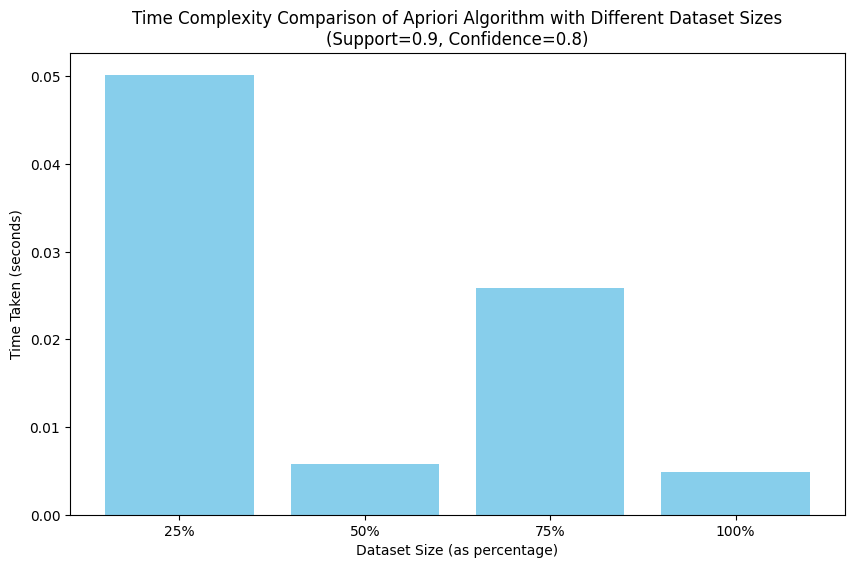

In [ ]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import time

# Load the dataset
data_path = 'mushroom.dat'  # Path to your dataset
data = pd.read_csv(data_path, sep=' ', header=None)
data = data.dropna(axis=1)  # Drop any empty columns

# Preprocess the dataset
transactions = data.values.tolist()
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Ask user input for support and confidence values
min_support = float(input("Enter the minimum support value (e.g., 0.2): "))
min_confidence = float(input("Enter the minimum confidence value (e.g., 0.7): "))

# Dataset size fractions for sampling (as percentages of the original dataset)
dataset_sizes = [0.25, 0.5, 0.75, 1.0]  # 25%, 50%, 75%, and 100% of the dataset
time_taken_per_size = []  # To store time taken for different dataset sizes

# Test Apriori algorithm with varying dataset sizes
for size in dataset_sizes:
    print(f"\nTesting with dataset size: {int(size * 100)}%")

    # Sample the dataset based on the size fraction
    sampled_df = df.sample(frac=size, random_state=42)

    start_time = time.time()
    # Apply Apriori Algorithm with user-specified support
    frequent_itemsets = apriori(sampled_df, min_support=min_support, use_colnames=True)

    # Generate association rules with user-specified confidence
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

    end_time = time.time()

    time_taken = end_time - start_time
    time_taken_per_size.append(time_taken)

    print(f"Dataset size: {int(size * 100)}%, Time taken: {time_taken:.4f} seconds, Rules generated: {len(rules)}")

# Plotting the bar graph for time comparison
plt.figure(figsize=(10, 6))
plt.bar([str(int(size * 100)) + '%' for size in dataset_sizes], time_taken_per_size, color='skyblue')
plt.title(f'Time Complexity Comparison of Apriori Algorithm with Different Dataset Sizes\n(Support={min_support}, Confidence={min_confidence})')
plt.xlabel('Dataset Size (as percentage)')
plt.ylabel('Time Taken (seconds)')
plt.show()



1) B. Test drive the Arpiori algorithm in terms of Time and rules generated by varying
a. support value to be in the range of 20% to 40%
b. Confidence value in the range of 70% to 90%
Test drive with at least three different combinations of Support and confidence values



Combination 1:
Support: 0.4, Confidence: 0.9, Time taken: 0.0794 seconds, Rules generated: 2587

Combination 2:
Support: 0.39, Confidence: 0.85, Time taken: 0.0667 seconds, Rules generated: 3663

Combination 3:
Support: 0.38, Confidence: 0.8, Time taken: 0.0862 seconds, Rules generated: 5892

Summary of Results:
Support   Confidence  Time Taken (s)  Rules Generated
0.4       0.9         0.079449176788330082587           
0.39      0.85        0.066694974899291993663           
0.38      0.8         0.08619713783264165892           


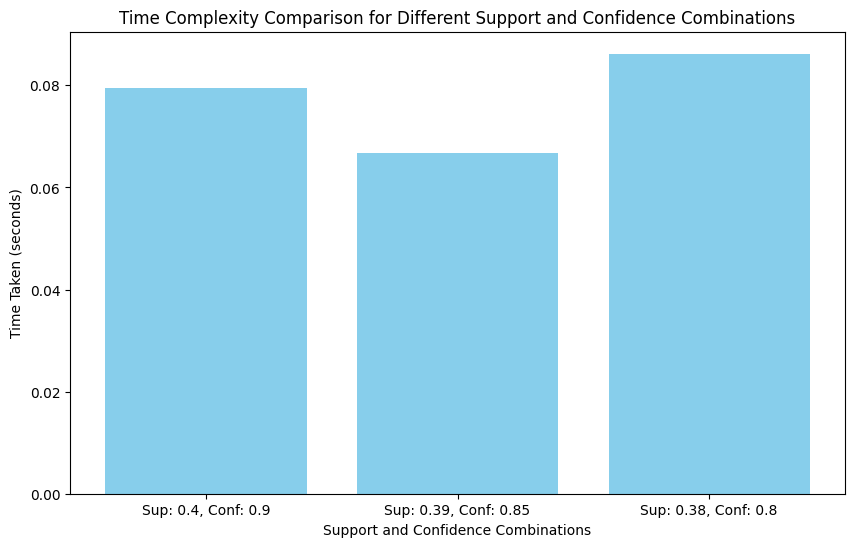

In [ ]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import time

# Load the dataset
data_path = 'mushroom.dat'  # Path to your dataset
data = pd.read_csv(data_path, sep=' ', header=None)
data = data.dropna(axis=1)  # Drop any empty columns

# Preprocess the dataset
transactions = data.values.tolist()
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Reduce the dataset size by taking a sample (e.g., 20% of the data)
df_sampled = df.sample(frac=0.2, random_state=42)  # Modify frac value if needed

# Function to get user input for support and confidence values
def get_user_inputs():
    support = float(input("Enter a minimum support value between 0.2 and 0.4: "))
    while not (0.2 <= support <= 0.4):
        print("Invalid input! Please enter a value between 0.2 and 0.4.")
        support = float(input("Enter a minimum support value between 0.2 and 0.4: "))

    confidence = float(input("Enter a minimum confidence value between 0.7 and 0.9: "))
    while not (0.7 <= confidence <= 0.9):
        print("Invalid input! Please enter a value between 0.7 and 0.9.")
        confidence = float(input("Enter a minimum confidence value between 0.7 and 0.9: "))

    return support, confidence

# List to store time and rules generated for each combination
results = []

# Test Apriori algorithm with three different combinations of support and confidence
for i in range(3):
    print(f"\nCombination {i+1}:")
    support, confidence = get_user_inputs()

    start_time = time.time()
    # Apply Apriori Algorithm with user-specified support and low_memory option
    frequent_itemsets = apriori(df_sampled, min_support=support, use_colnames=True, low_memory=True)

    # Generate association rules with user-specified confidence
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)

    end_time = time.time()

    time_taken = end_time - start_time

    # Store result for each support-confidence combination
    results.append({
        'support': support,
        'confidence': confidence,
        'rules_generated': len(rules),
        'time_taken': time_taken
    })

    print(f"Support: {support}, Confidence: {confidence}, Time taken: {time_taken:.4f} seconds, Rules generated: {len(rules)}")

# Displaying the results in a table format
print("\nSummary of Results:")
print(f"{'Support':<10}{'Confidence':<12}{'Time Taken (s)':<16}{'Rules Generated':<15}")
for result in results:
    print(f"{result['support']:<10}{result['confidence']:<12}{result['time_taken']:<16}{result['rules_generated']:<15}")

# Plotting the time comparison for different combinations
plt.figure(figsize=(10, 6))
x_labels = [f"Sup: {r['support']}, Conf: {r['confidence']}" for r in results]
time_taken = [r['time_taken'] for r in results]
plt.bar(x_labels, time_taken, color='skyblue')
plt.title('Time Complexity Comparison for Different Support and Confidence Combinations')
plt.xlabel('Support and Confidence Combinations')
plt.ylabel('Time Taken (seconds)')
plt.show()



2) Test drive the basic version of FP Growth algorithms for Frequent Itemset Mining using the package / library support in the platform of your choice. Test it with various support and confidence measures and generate a time comparison for varied data set sizes. To do the performance comparison you may use benchmark datasets provided for FIM such as the FIMI workshop or other sources.


Test Case 1:
Support: 0.4, Confidence: 0.9, Time taken: 0.0791 seconds, Rules generated: 2404

Test Case 2:
Support: 0.39, Confidence: 0.85, Time taken: 0.1626 seconds, Rules generated: 3658

Test Case 3:
Support: 0.37, Confidence: 0.84, Time taken: 0.1012 seconds, Rules generated: 5728

Summary of Results:
Support   Confidence  Time Taken (s)  Rules Generated
0.4       0.9         0.079109430313110352404           
0.39      0.85        0.162573575973510743658           
0.37      0.84        0.101158857345581055728           


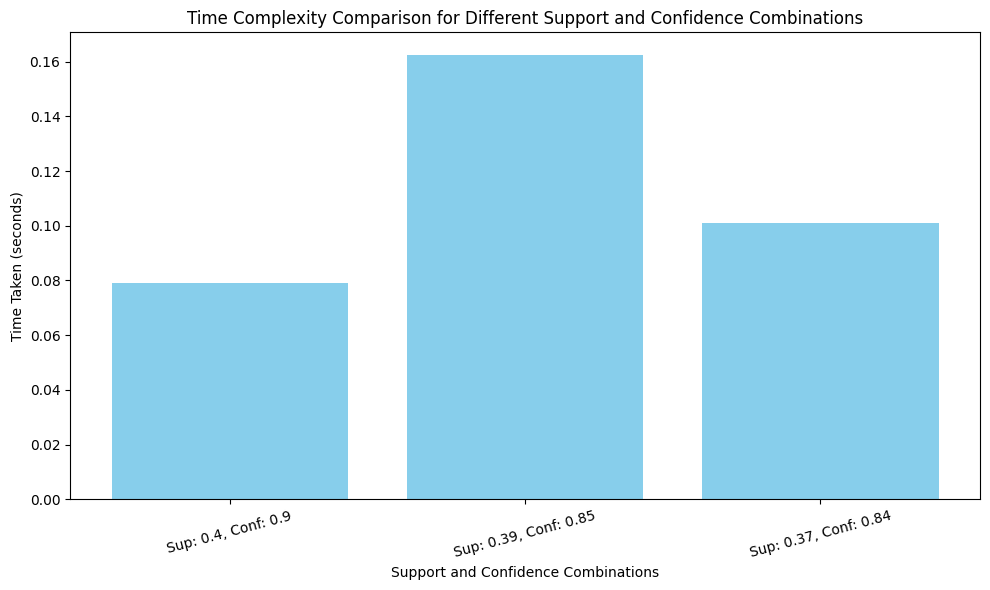

In [ ]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules
import time

# Load the dataset
data_path = 'mushroom.dat'  # Path to your dataset
data = pd.read_csv(data_path, sep=' ', header=None)
data = data.dropna(axis=1)  # Drop any empty columns

# Preprocess the dataset
transactions = data.values.tolist()
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Function to get user input for support and confidence values
def get_user_inputs():
    support = float(input("Enter a minimum support value between 0.2 and 0.4: "))
    while not (0.2 <= support <= 0.4):
        print("Invalid input! Please enter a value between 0.2 and 0.4.")
        support = float(input("Enter a minimum support value between 0.2 and 0.4: "))

    confidence = float(input("Enter a minimum confidence value between 0.7 and 0.9: "))
    while not (0.7 <= confidence <= 0.9):
        print("Invalid input! Please enter a value between 0.7 and 0.9.")
        confidence = float(input("Enter a minimum confidence value between 0.7 and 0.9: "))

    return support, confidence

# Function to run FP-Growth and store results
def run_fp_growth(support, confidence, data_frame):
    start_time = time.time()
    # Apply FP-Growth Algorithm
    frequent_itemsets = fpgrowth(data_frame, min_support=support, use_colnames=True)

    # Generate association rules
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)

    end_time = time.time()

    return end_time - start_time, len(rules)

# List to store time and rules generated for each combination
results = []

# Number of test cases
num_tests = 3
for i in range(num_tests):
    print(f"\nTest Case {i + 1}:")
    support, confidence = get_user_inputs()

    time_taken, rules_generated = run_fp_growth(support, confidence, df)

    # Store result for each support-confidence combination
    results.append({
        'support': support,
        'confidence': confidence,
        'rules_generated': rules_generated,
        'time_taken': time_taken
    })

    print(f"Support: {support}, Confidence: {confidence}, Time taken: {time_taken:.4f} seconds, Rules generated: {rules_generated}")

# Displaying the results in a table format
print("\nSummary of Results:")
print(f"{'Support':<10}{'Confidence':<12}{'Time Taken (s)':<16}{'Rules Generated':<15}")
for result in results:
    print(f"{result['support']:<10}{result['confidence']:<12}{result['time_taken']:<16}{result['rules_generated']:<15}")

# Plotting the time comparison for different combinations
plt.figure(figsize=(10, 6))
x_labels = [f"Sup: {r['support']}, Conf: {r['confidence']}" for r in results]
time_taken = [r['time_taken'] for r in results]
plt.bar(x_labels, time_taken, color='skyblue')
plt.title('Time Complexity Comparison for Different Support and Confidence Combinations')
plt.xlabel('Support and Confidence Combinations')
plt.ylabel('Time Taken (seconds)')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()
